In [ ]:
import numpy as np

from nilearn.plotting import plot_design_matrix

t_r = 1 # 1 sample of the 3D brain per second
n_scans = 128 # Total number of 3D brain samples collected

print(f"repetition time is {t_r} second")
print(f"the acquisition comprises {n_scans} scans")

frame_times = (
    np.arange(n_scans) * t_r
)  # here are the corresponding frame times

repetition time is 1 second
the acquisition comprises 128 scans


In [8]:
# these are the types of the different trials
conditions = ["c0", "c0", "c0", "c1", "c1", "c1", "c3", "c3", "c3"]
duration = [0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1]
# these are the corresponding onset times
onsets = [30.0, 70.0, 100.0, 10.0, 30.0, 90.0, 30.0, 40.0, 60.0]
# Next, we simulate 6 motion parameters jointly observed with fMRI acquisitions
rng = np.random.default_rng(42)
motion = np.cumsum(rng.standard_normal((n_scans, 6)), 0)
# The 6 parameters correspond to three translations and three
# rotations describing rigid body motion
add_reg_names = ["tx", "ty", "tz", "rx", "ry", "rz"]

In [9]:
import pandas as pd

events = pd.DataFrame(
    {"trial_type": conditions, "onset": onsets, "duration": duration}
)

In [10]:
events

,trial_type,onset,duration
0,c0,30.0,0.1
1,c0,70.0,0.0
2,c0,100.0,0.1
3,c1,10.0,0.1
4,c1,30.0,0.0
5,c1,90.0,0.1
6,c3,30.0,0.1
7,c3,40.0,0.0
8,c3,60.0,0.1


In [11]:
from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "glover"
X1 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial", # additional confounding effects of fMRI data
    drift_order=3, # t, t^2, t^3
    add_regs=motion, # Additional confounding effects 
    add_reg_names=add_reg_names, # names of the confounding effects
    hrf_model=hrf_model,
)

/var/folders/xd/6fbjp5ms7ss8c4xxlmz91xkm0000gn/T/ipykernel_69176/384617039.py:4: UserWarning: The following conditions contain events with null duration:
- 'c0'
- 'c1'
- 'c3'

  X1 = make_first_level_design_matrix(


In [12]:
duration = 7.0 * np.ones(len(conditions))
events = pd.DataFrame(
    {"trial_type": conditions, "onset": onsets, "duration": duration}
)

In [13]:
events

,trial_type,onset,duration
0,c0,30.0,7.0
1,c0,70.0,7.0
2,c0,100.0,7.0
3,c1,10.0,7.0
4,c1,30.0,7.0
5,c1,90.0,7.0
6,c3,30.0,7.0
7,c3,40.0,7.0
8,c3,60.0,7.0


In [14]:
X2 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial",
    drift_order=3,
    hrf_model=hrf_model,
)

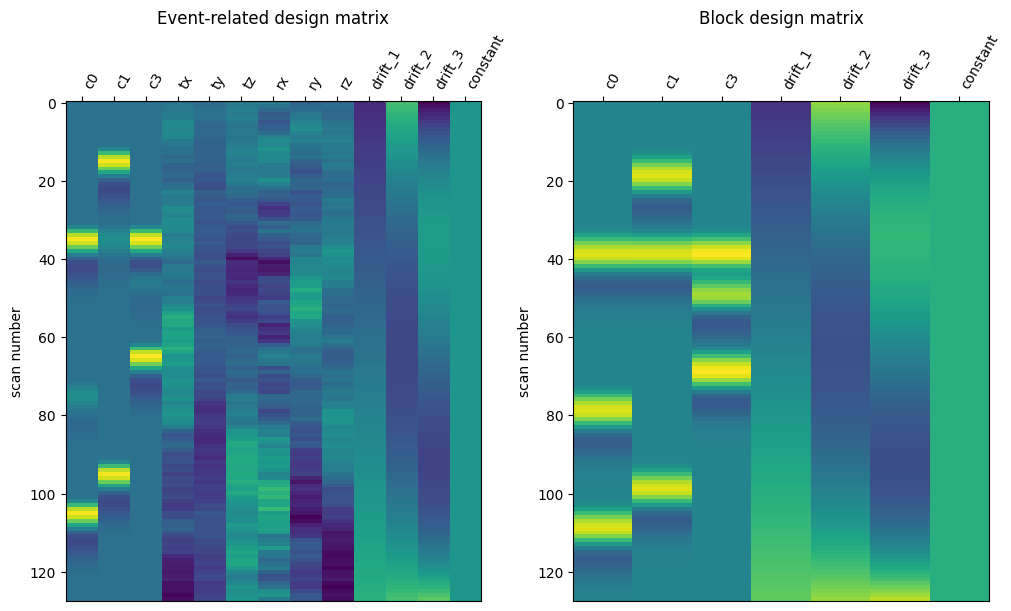

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(
    figsize=(10, 6), nrows=1, ncols=2, constrained_layout=True
)

plot_design_matrix(X1, axes=ax1)
ax1.set_title("Event-related design matrix", fontsize=12)
plot_design_matrix(X2, axes=ax2)
ax2.set_title("Block design matrix", fontsize=12)
plt.show()

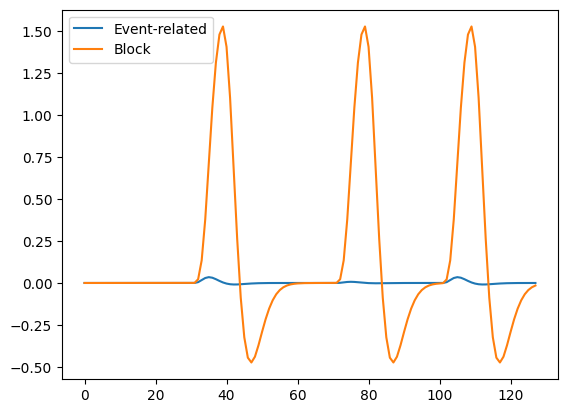

In [22]:
plt.plot(frame_times, X1["c0"].values, label="Event-related")
plt.plot(frame_times, X2["c0"].values, label="Block")
plt.legend()
plt.show()

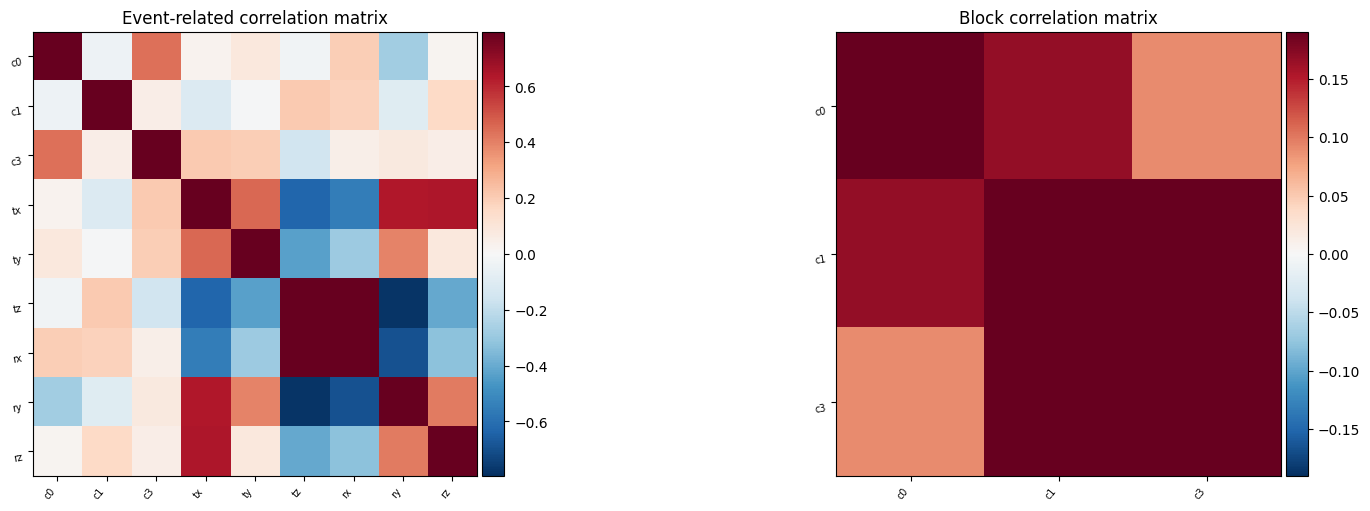

In [20]:
# Is this model actually going to be good?
from nilearn.plotting import plot_design_matrix_correlation

fig, (ax1, ax2) = plt.subplots(
    figsize=(16, 5), nrows=1, ncols=2, constrained_layout=True
)

plot_design_matrix_correlation(X1, axes=ax1)
ax1.set_title("Event-related correlation matrix", fontsize=12)
plot_design_matrix_correlation(X2, axes=ax2)
ax2.set_title("Block correlation matrix", fontsize=12)
plt.show()

In [ ]:
# Check if the switch regressor is highly correlated with any of the parameters

In [ ]:
# Parametric modulation:
# c0: gain
# c1: loss
# (Hypothetical) In the experiment, we show gain 5.05, 1.25, 3.25
# If you were curious about which brain regions activate based on the amount of 
# gain, then you set the parametric modulator. 

#### On our actual data:

In [24]:
import pandas as pd
pth = "../data/sample_data.txt"
events = pd.read_csv(pth, sep="\t")

In [25]:
events

,onset,duration,trial_period,trial,TR_relativeToTrialOnset,trial_type,response_time,button_pressed,choice,outcome,gamble_position,rightbutton_position,total_gain
0,12.0008,2,prechoice,1,1,symmetric,NaN,NaN,NaN,NaN,bottom,NaN,NaN
1,14.0008,4,choice,1,2,symmetric,2.3919,left,gamble,NaN,bottom,top,NaN
2,18.0008,2,outcome,1,4,symmetric,NaN,NaN,NaN,3.05,NaN,NaN,19.15
3,20.0008,2,ITI,1,5,symmetric,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.0008,2,ITI,1,6,symmetric,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,864.0001,2,ITI,71,6,positiveSkew,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,866.0001,2,prechoice,72,1,positiveSkew,NaN,NaN,NaN,NaN,bottom,NaN,NaN
357,868.0001,4,choice,72,2,positiveSkew,2.0084,right,safe,NaN,bottom,top,NaN
358,872.0001,2,outcome,72,4,positiveSkew,NaN,NaN,NaN,0.00,NaN,NaN,18.30


In [26]:
t_r = 2 # 1 sample of the 3D brain per 2 second
n_scans = 442 # Total number of 3D brain samples collected

print(f"repetition time is {t_r} second")
print(f"the acquisition comprises {n_scans} scans")

frame_times = (
    np.arange(n_scans) * t_r
)  # here are the corresponding frame times

repetition time is 2 second
the acquisition comprises 442 scans


In [27]:
from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "glover" # Arbitrary choice
X1 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial", # additional confounding effects of fMRI data
    drift_order=3, # t, t^2, t^3
    hrf_model=hrf_model,
)

/var/folders/xd/6fbjp5ms7ss8c4xxlmz91xkm0000gn/T/ipykernel_69176/4189574848.py:4: UserWarning: The following unexpected columns in events data will be ignored: button_pressed, trial_period, outcome, TR_relativeToTrialOnset, trial, rightbutton_position, gamble_position, response_time, total_gain, choice
  X1 = make_first_level_design_matrix(


<Axes: label='conditions', ylabel='scan number'>

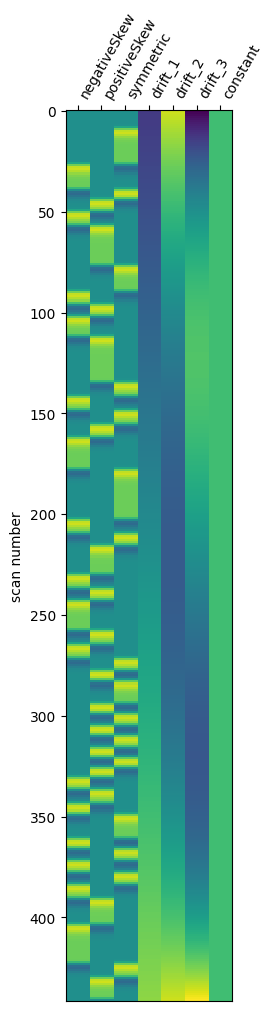

In [28]:
plot_design_matrix(X1)

In [31]:
events[["onset", "duration", "trial_type"]]

,onset,duration,trial_type
0,12.0008,2,symmetric
1,14.0008,4,symmetric
2,18.0008,2,symmetric
3,20.0008,2,symmetric
4,22.0008,2,symmetric
...,...,...,...
355,864.0001,2,positiveSkew
356,866.0001,2,positiveSkew
357,868.0001,4,positiveSkew
358,872.0001,2,positiveSkew


In [ ]:
# TODO: Include the switch regressors in the design matrix
# Each analysis happens within a subject, not across subjects. 

### Run the first level model:

In [ ]:
subject_data = "path to the bold .nii.gz file for the subject"
design_matrices = "your design matrix for the subject as above"

from nilearn.glm.first_level import FirstLevelModel
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(subject_data, design_matrices=design_matrices)